In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np

## loading the dataset

In [2]:
df=pd.read_csv('Dataset.csv')

In [3]:
df.head()

,Unnamed: 0,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,...,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_ID
0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,1,0,17072
1,1,1,65.0,100.0,NaN,NaN,72.0,NaN,16.5,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,2,0,17072
2,2,2,78.0,100.0,NaN,NaN,42.5,NaN,NaN,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,3,0,17072
3,3,3,73.0,100.0,NaN,NaN,NaN,NaN,17.0,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,4,0,17072
4,4,4,70.0,100.0,NaN,129.0,74.0,69.0,14.0,NaN,...,NaN,330.0,68.54,0,NaN,NaN,-0.02,5,0,17072


## data preprocessing 

In [4]:
df.shape

(1552210, 44)

In [5]:
df.columns

Index(['Unnamed: 0', 'Hour', 'HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP',
       'Resp', 'EtCO2', 'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2',
       'AST', 'BUN', 'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine',
       'Bilirubin_direct', 'Glucose', 'Lactate', 'Magnesium', 'Phosphate',
       'Potassium', 'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC',
       'Fibrinogen', 'Platelets', 'Age', 'Gender', 'Unit1', 'Unit2',
       'HospAdmTime', 'ICULOS', 'SepsisLabel', 'Patient_ID'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1552210 entries, 0 to 1552209
Data columns (total 44 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Unnamed: 0        1552210 non-null  int64  
 1   Hour              1552210 non-null  int64  
 2   HR                1398811 non-null  float64
 3   O2Sat             1349474 non-null  float64
 4   Temp              525226 non-null   float64
 5   SBP               1325945 non-null  float64
 6   MAP               1358940 non-null  float64
 7   DBP               1065656 non-null  float64
 8   Resp              1313875 non-null  float64
 9   EtCO2             57636 non-null    float64
 10  BaseExcess        84145 non-null    float64
 11  HCO3              65028 non-null    float64
 12  FiO2              129365 non-null   float64
 13  pH                107573 non-null   float64
 14  PaCO2             86301 non-null    float64
 15  SaO2              53561 non-null    float64
 16  

In [7]:
df.describe()

,Unnamed: 0,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,...,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_ID
count,1.552210e+06,1.552210e+06,1.398811e+06,1.349474e+06,525226.000000,1.325945e+06,1.358940e+06,1.065656e+06,1.313875e+06,57636.000000,...,10242.000000,92209.000000,1.552210e+06,1.552210e+06,940250.000000,940250.000000,1.552202e+06,1.552210e+06,1.552210e+06,1.552210e+06
mean,2.549274e+01,2.549274e+01,8.458144e+01,9.719395e+01,36.977228,1.237505e+02,8.240010e+01,6.383056e+01,1.872650e+01,32.957657,...,287.385706,196.013911,6.200947e+01,5.592690e-01,0.496571,0.503429,-5.612512e+01,2.699499e+01,1.798468e-02,5.920148e+04
std,2.888256e+01,2.888256e+01,1.732524e+01,2.936924e+00,0.770014,2.323156e+01,1.634175e+01,1.395601e+01,5.098194e+00,7.951662,...,153.002908,103.635366,1.638622e+01,4.964749e-01,0.499989,0.499989,1.622569e+02,2.900542e+01,1.328956e-01,5.024819e+04
min,0.000000e+00,0.000000e+00,2.000000e+01,2.000000e+01,20.900000,2.000000e+01,2.000000e+01,2.000000e+01,1.000000e+00,10.000000,...,34.000000,1.000000,1.400000e+01,0.000000e+00,0.000000,0.000000,-5.366860e+03,1.000000e+00,0.000000e+00,1.000000e+00
25%,9.000000e+00,9.000000e+00,7.200000e+01,9.600000e+01,36.500000,1.070000e+02,7.100000e+01,5.400000e+01,1.500000e+01,28.000000,...,184.000000,126.000000,5.168000e+01,0.000000e+00,0.000000,0.000000,-4.705000e+01,1.100000e+01,0.000000e+00,9.990000e+03
50%,1.900000e+01,1.900000e+01,8.350000e+01,9.800000e+01,37.000000,1.210000e+02,8.000000e+01,6.200000e+01,1.800000e+01,33.000000,...,250.000000,181.000000,6.400000e+01,1.000000e+00,0.000000,1.000000,-6.030000e+00,2.100000e+01,0.000000e+00,1.996500e+04
75%,3.300000e+01,3.300000e+01,9.550000e+01,9.950000e+01,37.500000,1.380000e+02,9.200000e+01,7.200000e+01,2.150000e+01,38.000000,...,349.000000,244.000000,7.400000e+01,1.000000e+00,1.000000,1.000000,-4.000000e-02,3.400000e+01,0.000000e+00,1.098780e+05
max,3.350000e+02,3.350000e+02,2.800000e+02,1.000000e+02,50.000000,3.000000e+02,3.000000e+02,3.000000e+02,1.000000e+02,100.000000,...,1760.000000,2322.000000,1.000000e+02,1.000000e+00,1.000000,1.000000,2.399000e+01,3.360000e+02,1.000000e+00,1.200000e+05


In [8]:
df.isnull().sum()

Unnamed: 0                0
Hour                      0
HR                   153399
O2Sat                202736
Temp                1026984
SBP                  226265
MAP                  193270
DBP                  486554
Resp                 238335
EtCO2               1494574
BaseExcess          1468065
HCO3                1487182
FiO2                1422845
pH                  1444637
PaCO2               1465909
SaO2                1498649
AST                 1527027
BUN                 1445642
Alkalinephos        1527269
Calcium             1460879
Chloride            1481744
Creatinine          1457594
Bilirubin_direct    1549220
Glucose             1286694
Lactate             1510764
Magnesium           1454259
Phosphate           1489909
Potassium           1407685
Bilirubin_total     1529069
TroponinI           1537429
Hct                 1414777
Hgb                 1437619
PTT                 1506511
WBC                 1452763
Fibrinogen          1541968
Platelets           

44 features

Target variable: 'SepsisLabel'

This is a sparse time series dataset

Time feature: "Hour"

In [9]:
## Check the missing values
null_values = df.isnull().mean()*100
null_values = null_values.sort_values(ascending=False)
null_values

Bilirubin_direct    99.807371
Fibrinogen          99.340167
TroponinI           99.047745
Bilirubin_total     98.509158
Alkalinephos        98.393194
AST                 98.377604
Lactate             97.329872
PTT                 97.055875
SaO2                96.549372
EtCO2               96.286843
Phosphate           95.986303
HCO3                95.810618
Chloride            95.460279
BaseExcess          94.579020
PaCO2               94.440121
Calcium             94.116067
Platelets           94.059502
Creatinine          93.904433
Magnesium           93.689578
WBC                 93.593199
BUN                 93.134434
pH                  93.069688
Hgb                 92.617558
FiO2                91.665754
Hct                 91.145979
Potassium           90.689082
Glucose             82.894325
Temp                66.162697
Unit2               39.425078
Unit1               39.425078
DBP                 31.345887
Resp                15.354559
SBP                 14.576958
O2Sat     

## EDA (Exploratory Data Analysis)


Missing values per column:


<Axes: >

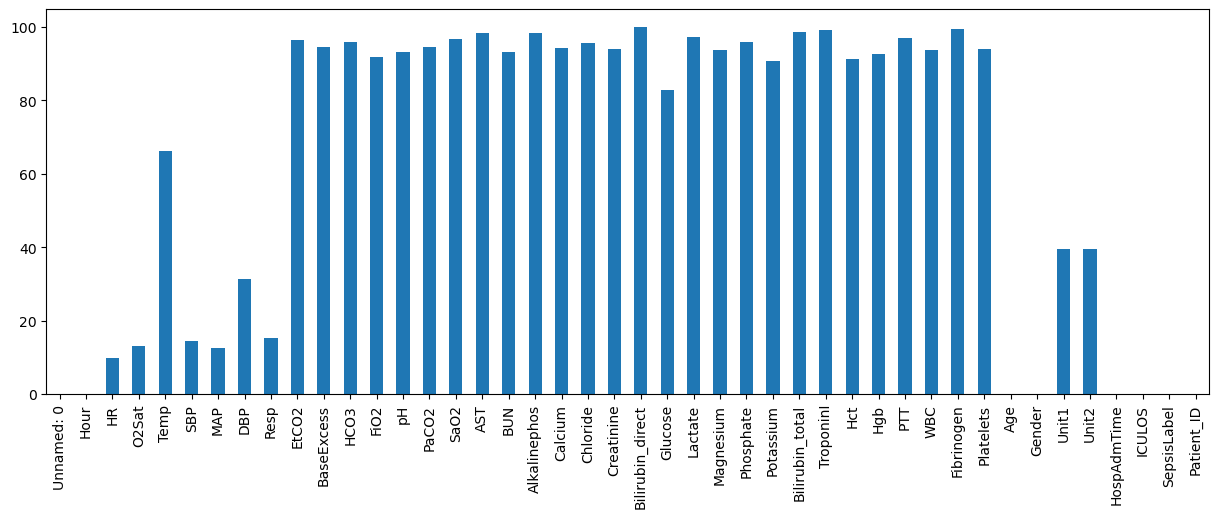

In [10]:
### For all lab values , more than 80% of data are missing
print("\nMissing values per column:")
round(100*(df.isnull().sum()/len(df.index)),2).plot.bar(figsize=(15,5))

In [11]:
## Drop the unhelpful columns
df = df.assign(Unit=df['Unit1'] + df['Unit2'])

columns_drop={'Unnamed: 0','SBP','DBP','EtCO2','BaseExcess', 'HCO3','pH','PaCO2','Alkalinephos', 'Calcium','Magnesium', 
'Phosphate','Potassium','PTT','Fibrinogen','Unit1','Unit2'}

df = df.drop(columns=columns_drop)

## Check the new columns of the dataset
df.columns

Index(['Hour', 'HR', 'O2Sat', 'Temp', 'MAP', 'Resp', 'FiO2', 'SaO2', 'AST',
       'BUN', 'Chloride', 'Creatinine', 'Bilirubin_direct', 'Glucose',
       'Lactate', 'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'WBC',
       'Platelets', 'Age', 'Gender', 'HospAdmTime', 'ICULOS', 'SepsisLabel',
       'Patient_ID', 'Unit'],
      dtype='object')

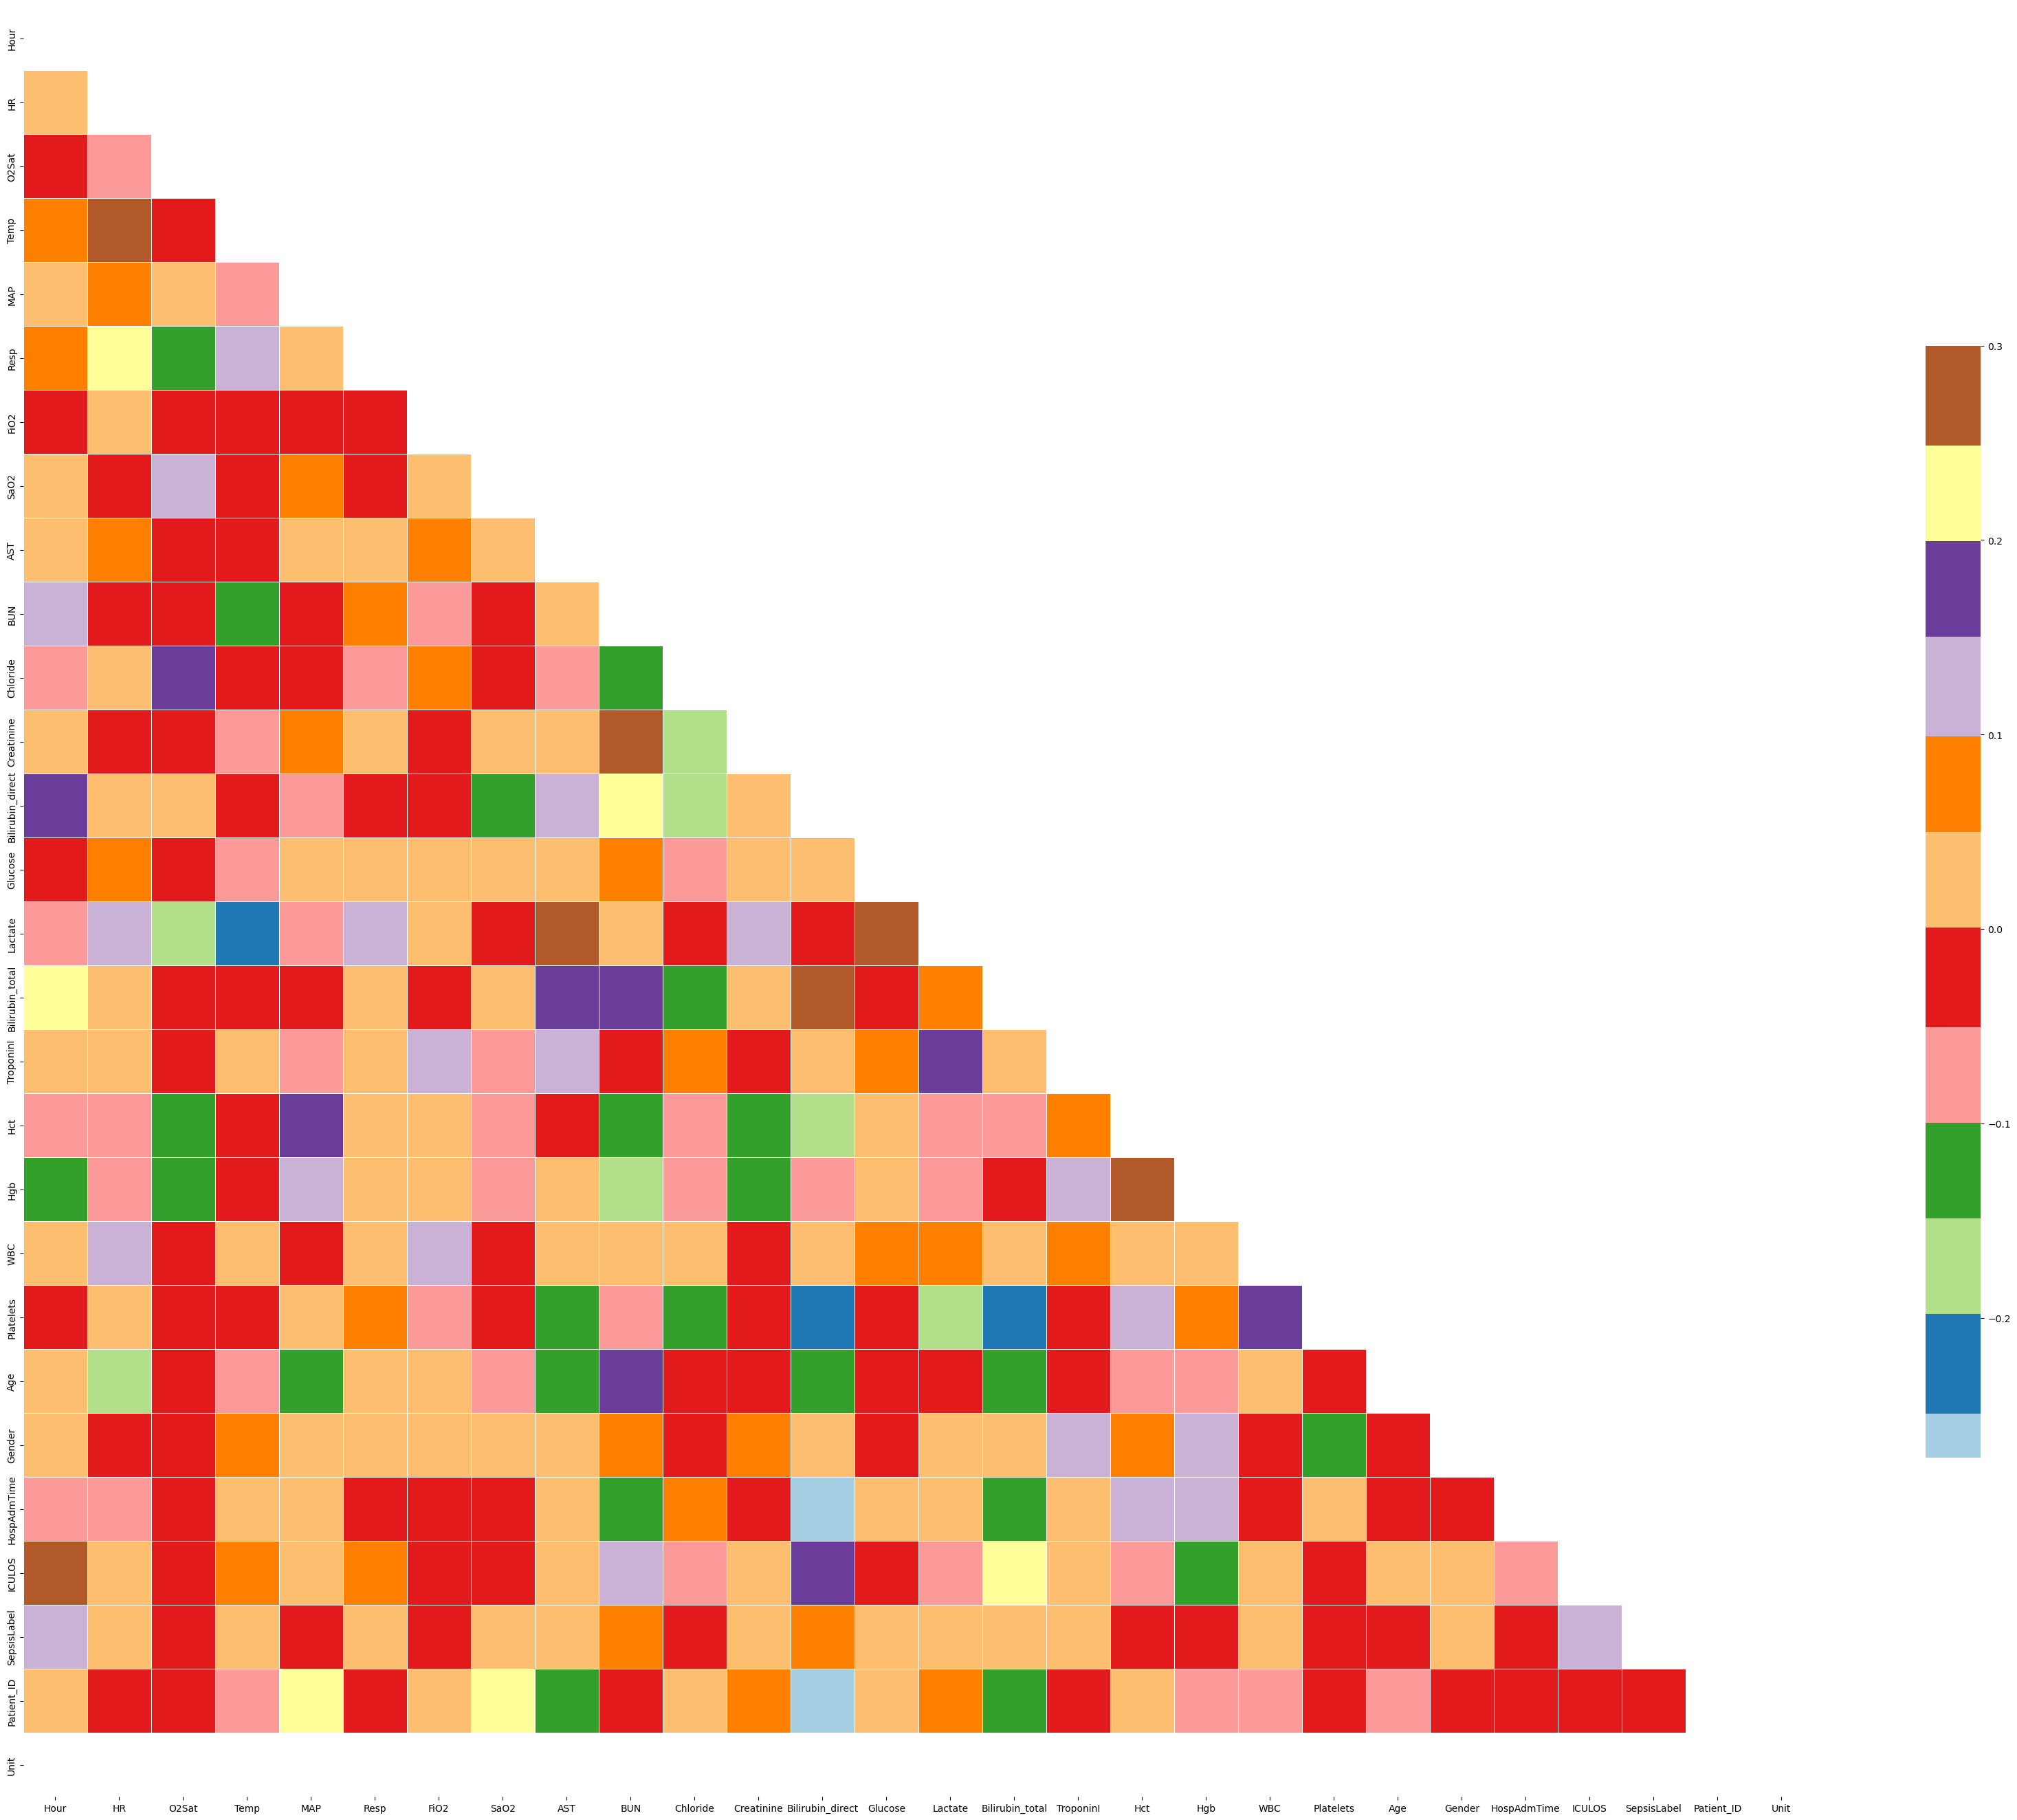

In [12]:
## Check the correlation between the features
def corr_matrix(df):
  corr = df.corr()
  mask = np.triu(np.ones_like(corr, dtype=bool))
  f, ax = plt.subplots(figsize=(42,42))
  cmap = sns.diverging_palette(220, 10, as_cmap=True)
  sns.heatmap(corr, mask=mask, cmap="Paired", vmax=.3, center=0,
              square=True, linewidths=.5, cbar_kws={"shrink": .5})
  
corr_matrix(df)

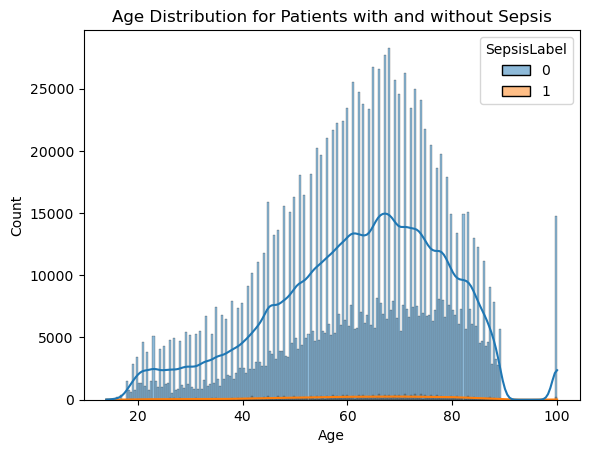

In [13]:
# Visualize the distribution of age for patients with and without sepsis
sns.histplot(data=df, x='Age', hue='SepsisLabel', kde=True)
plt.title('Age Distribution for Patients with and without Sepsis')
plt.show()

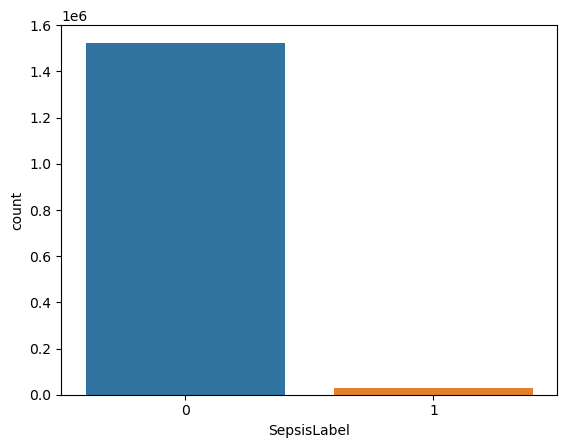

In [14]:
## Inbalance problem - Value counts of Sepsis Column
sns.countplot(x="SepsisLabel", data=df)
plt.show()

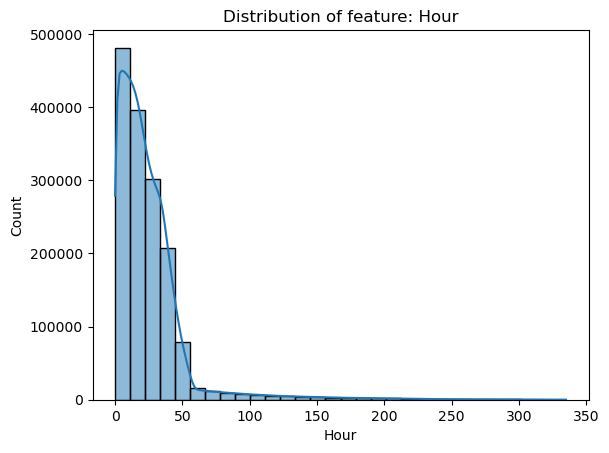

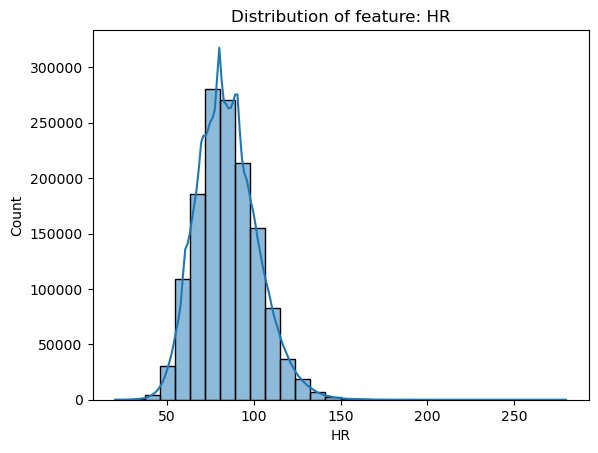

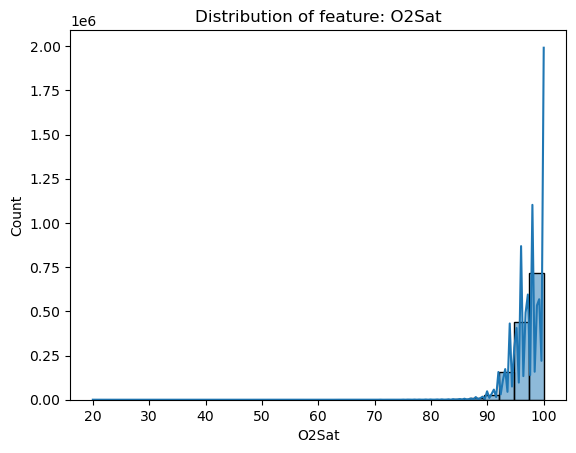

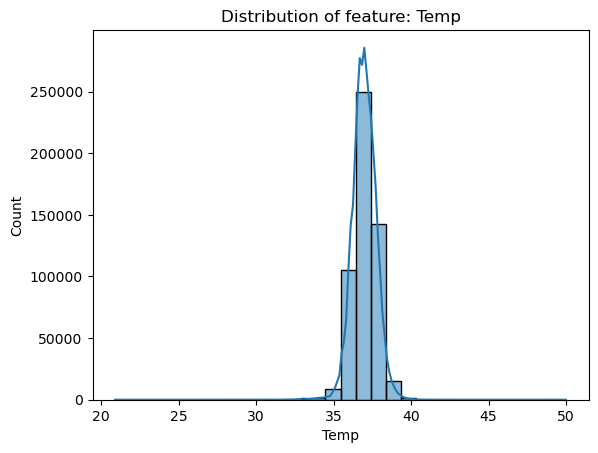

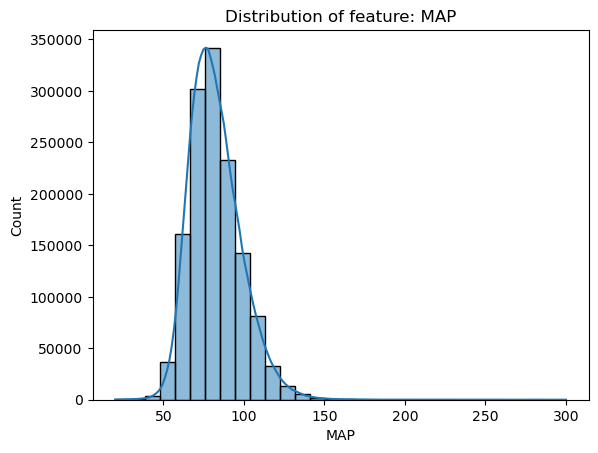

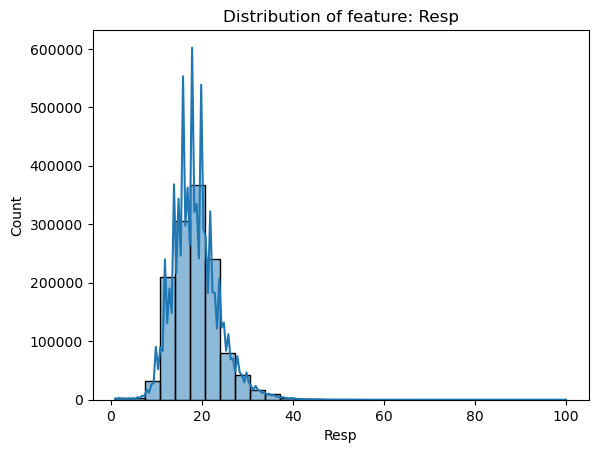

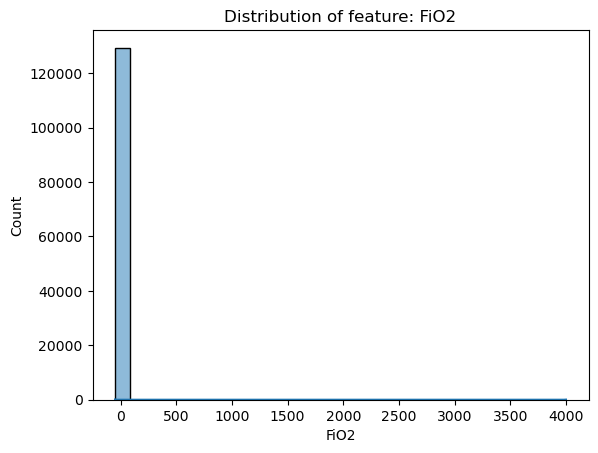

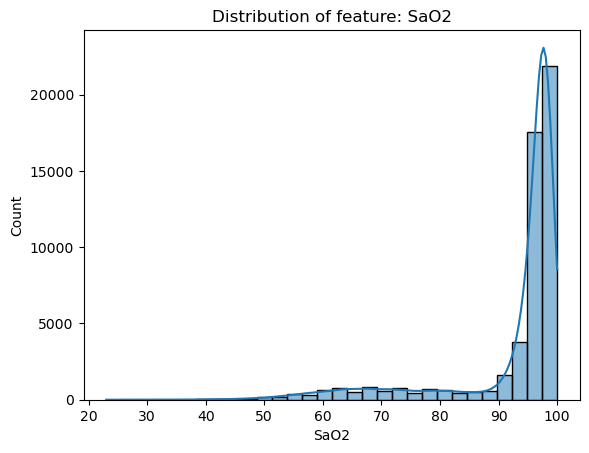

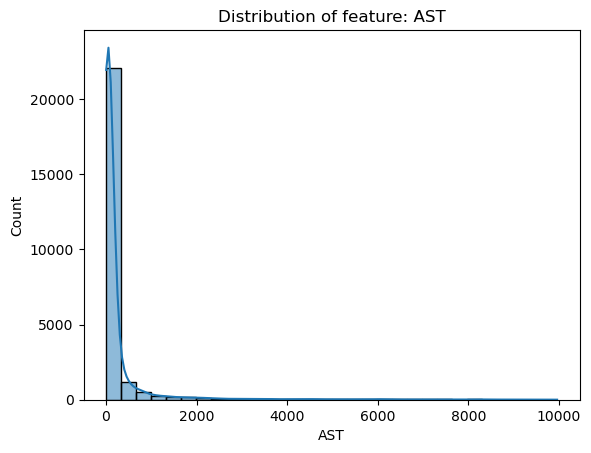

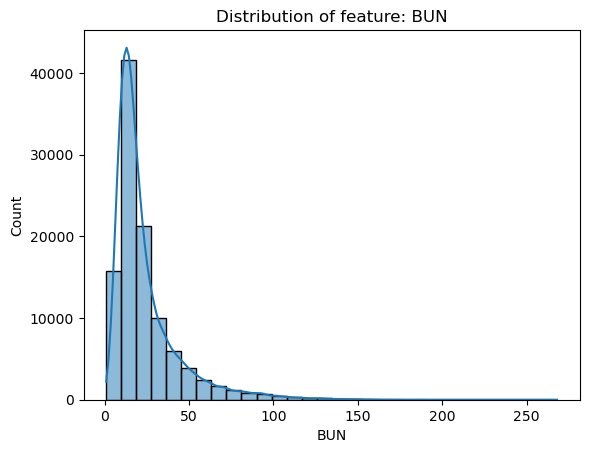

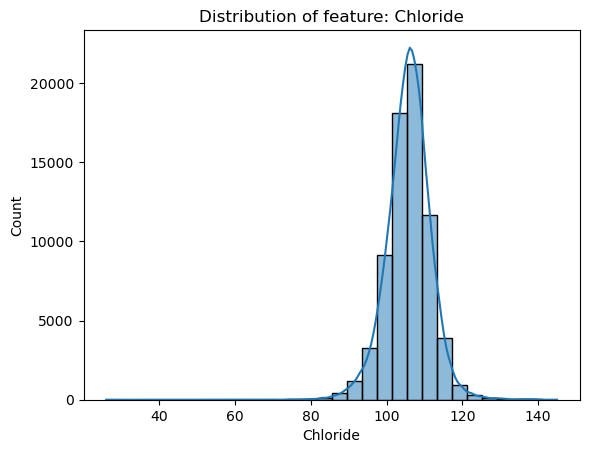

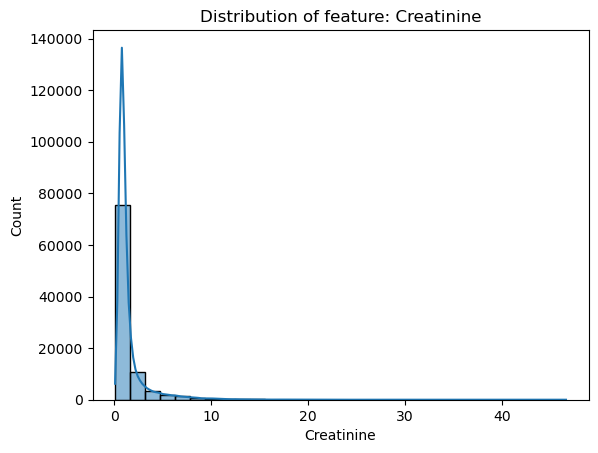

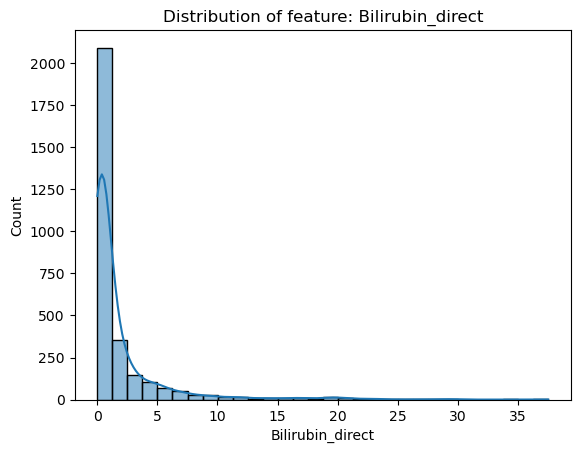

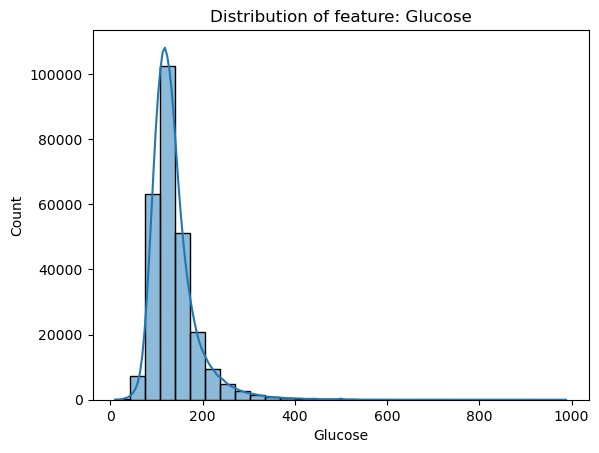

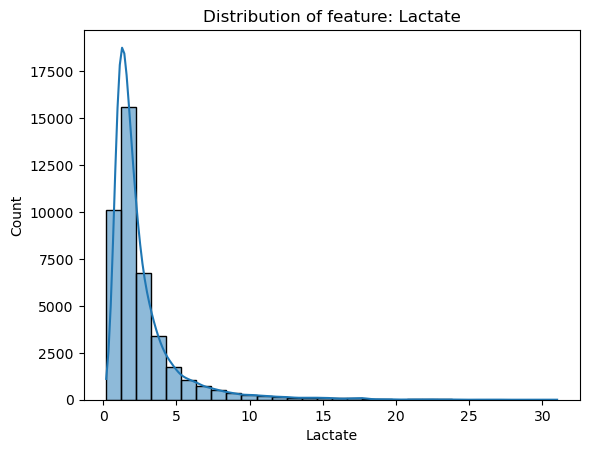

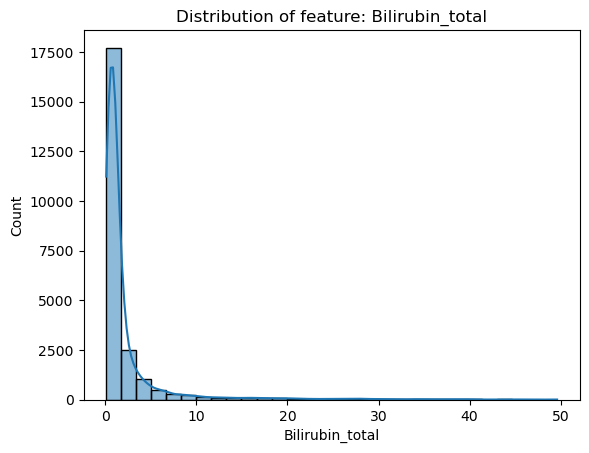

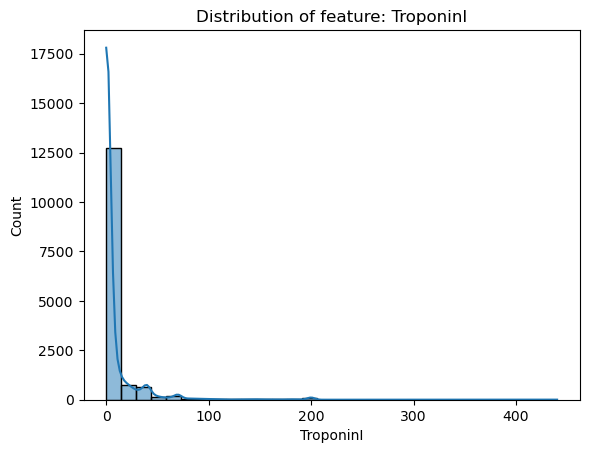

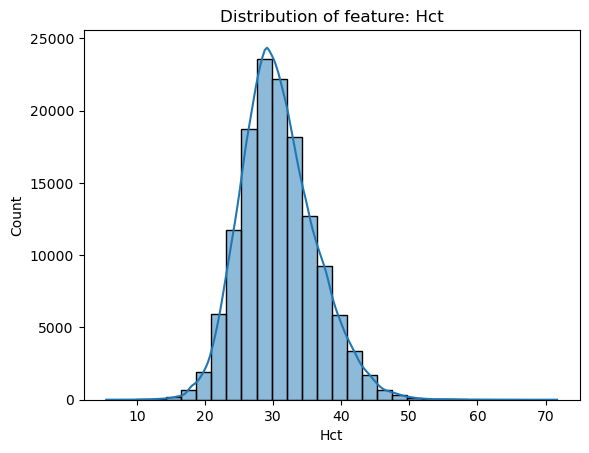

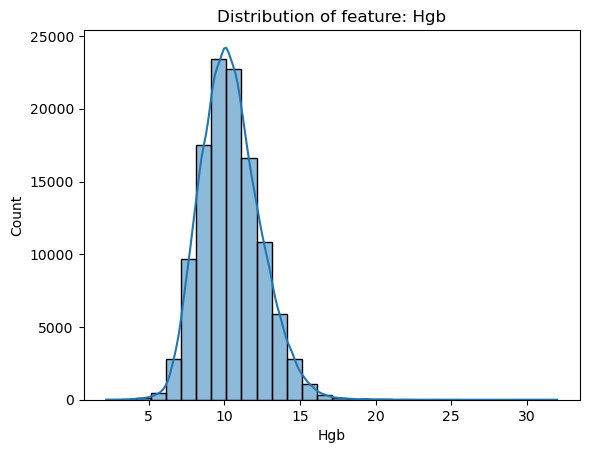

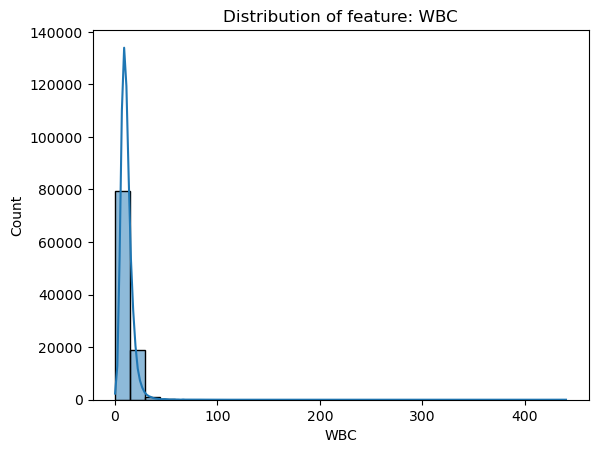

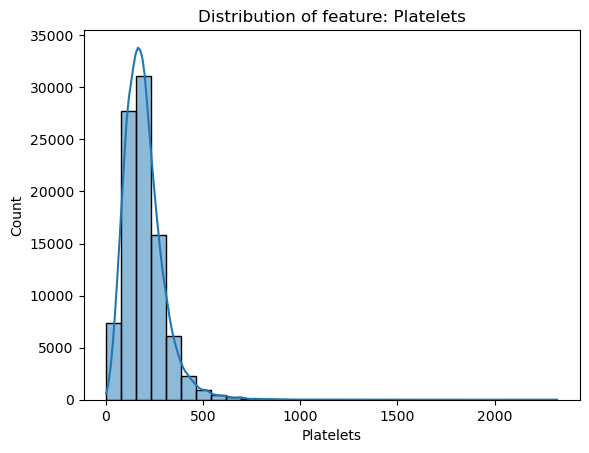

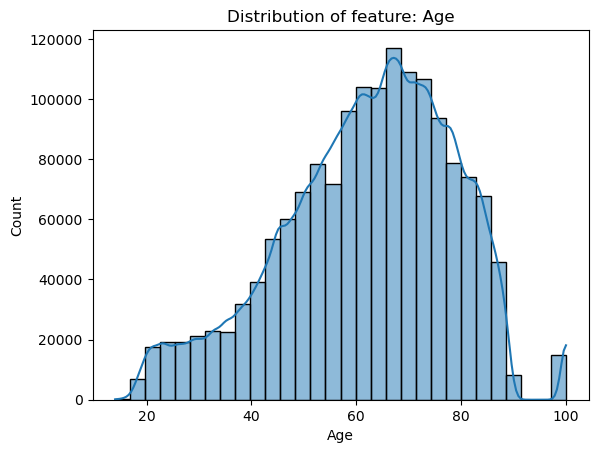

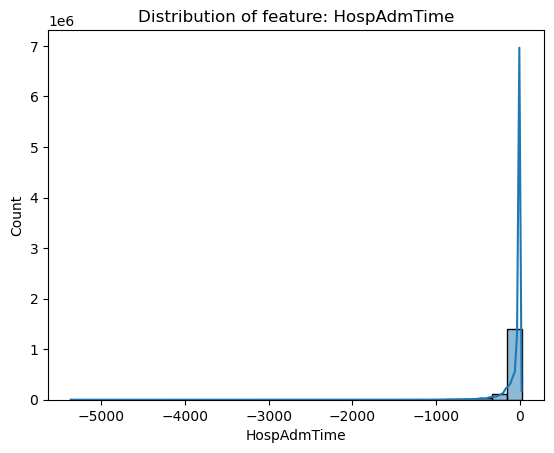

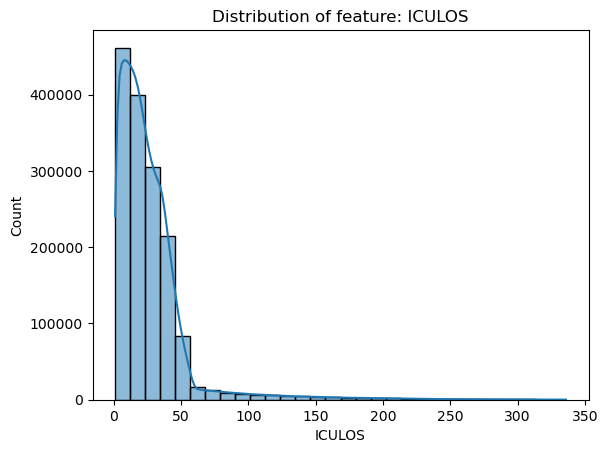

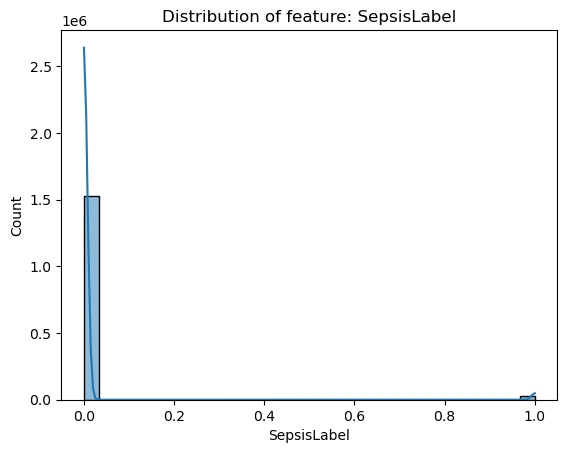

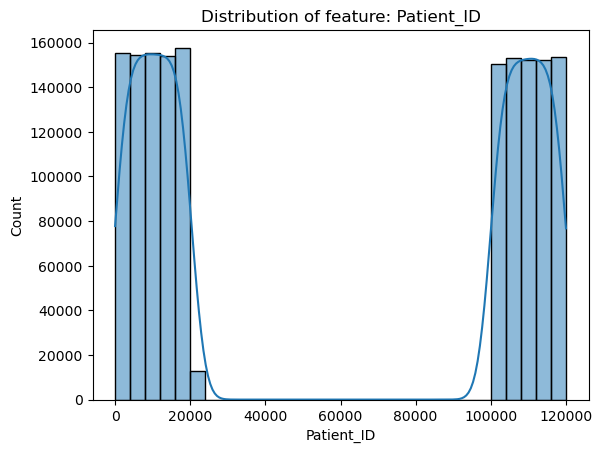

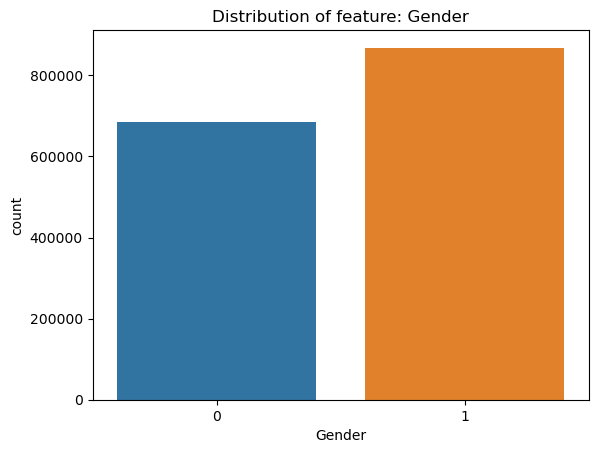

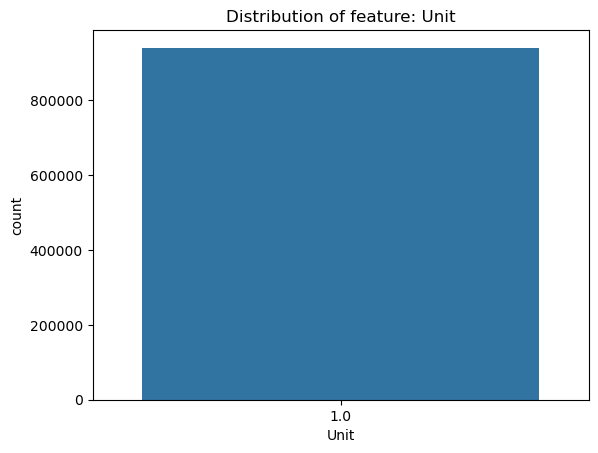

In [15]:
## Variables distribution graphs
## Continuous features of the dataset
continuous_features = ['Hour', 'HR', 'O2Sat', 'Temp', 'MAP', 'Resp', 'FiO2', 'SaO2', 'AST',
       'BUN', 'Chloride', 'Creatinine', 'Bilirubin_direct', 'Glucose',
       'Lactate', 'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'WBC',
       'Platelets', 'Age', 'HospAdmTime', 'ICULOS', 'SepsisLabel',
       'Patient_ID']

## Categorical features of the dataset
categorical_features = ['Gender', 'Unit']

## Plot histograms for the continuous columns
for feature in continuous_features:
    sns.histplot(data=df, x=feature, kde=True, bins=30)
    plt.title(f'Distribution of feature: {feature}')
    plt.show()

## Plot bar plots for categorical columns
for feature in categorical_features:
    sns.countplot(x=feature, data=df)
    plt.title(f'Distribution of feature: {feature}')
    plt.show()

In [16]:
# get the list of patients who have sepsis
septic_shock_patients=df['Patient_ID'][df['SepsisLabel']==1].unique()

In [17]:
# construct dataframe of patients with sepsis alone
septic_df=df[df.Patient_ID.isin(septic_shock_patients)]

In [18]:
# get the list of patients who have sepsis before admission to ICU
admitted_with_sepsis_patients=df['Patient_ID'][(df['SepsisLabel']==1) & (df['Hour']==0)]

In [19]:
# construct dataframe of patients who have sepsis before admission to ICU
admitted_with_sepsis_df=df[df.Patient_ID.isin(admitted_with_sepsis_patients)]

In [20]:
# construct dataframe of patients who have sepsis after admission to ICU
sepsis_after_adm_df=septic_df.merge(admitted_with_sepsis_df, how = 'outer' ,indicator=True).loc[lambda x : x['_merge']=='left_only']

In [21]:
# add a new column sepsisType in dataframe with value null
df['sepsisType']=np.nan

In [22]:
# update sepsisType to SepsisBeforeAdm for patients who were admitted to ICU with sepsis
df.loc[df.Patient_ID.isin(admitted_with_sepsis_patients), 'sepsisType'] = 'SepsisBeforeAdm'

In [23]:
# update sepsisType to SepsisAfterAdm for patients who contracted sepsis after admission to ICU
df.loc[df.Patient_ID.isin(septic_shock_patients) & df['sepsisType'].isnull(), 'sepsisType'] = 'SepsisAfterAdm'

In [24]:
# update sepsisType to NonSepsis for patients who never got Sepsis
df.loc[df['sepsisType'].isnull(), 'sepsisType'] = 'NonSepsis'

In [25]:
df['sepsisType'].value_counts()

sepsisType
NonSepsis          1379800
SepsisAfterAdm      168764
SepsisBeforeAdm       3646
Name: count, dtype: int64

<Axes: xlabel='sepsisType'>

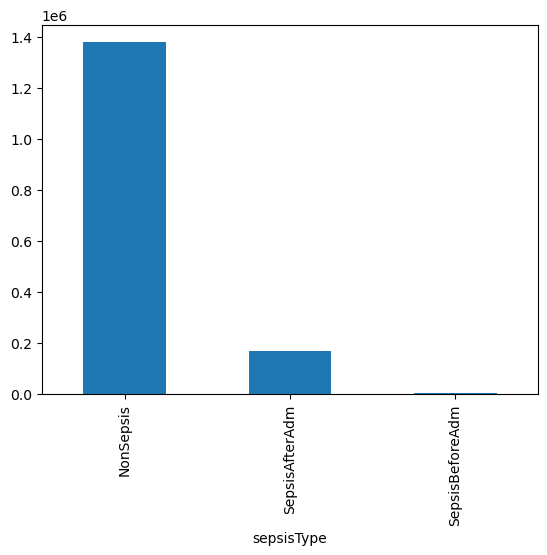

In [26]:
df['sepsisType'].value_counts().plot.bar()

## data preprocessing

In [27]:
df.head()

,Hour,HR,O2Sat,Temp,MAP,Resp,FiO2,SaO2,AST,BUN,...,WBC,Platelets,Age,Gender,HospAdmTime,ICULOS,SepsisLabel,Patient_ID,Unit,sepsisType
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,68.54,0,-0.02,1,0,17072,NaN,NonSepsis
1,1,65.0,100.0,NaN,72.0,16.5,0.4,NaN,NaN,NaN,...,NaN,NaN,68.54,0,-0.02,2,0,17072,NaN,NonSepsis
2,2,78.0,100.0,NaN,42.5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,68.54,0,-0.02,3,0,17072,NaN,NonSepsis
3,3,73.0,100.0,NaN,NaN,17.0,NaN,NaN,NaN,NaN,...,NaN,NaN,68.54,0,-0.02,4,0,17072,NaN,NonSepsis
4,4,70.0,100.0,NaN,74.0,14.0,0.4,NaN,NaN,23.0,...,11.3,330.0,68.54,0,-0.02,5,0,17072,NaN,NonSepsis


In [28]:
# Identify columns with missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)


Missing values in each column:
 Hour                      0
HR                   153399
O2Sat                202736
Temp                1026984
MAP                  193270
Resp                 238335
FiO2                1422845
SaO2                1498649
AST                 1527027
BUN                 1445642
Chloride            1481744
Creatinine          1457594
Bilirubin_direct    1549220
Glucose             1286694
Lactate             1510764
Bilirubin_total     1529069
TroponinI           1537429
Hct                 1414777
Hgb                 1437619
WBC                 1452763
Platelets           1460001
Age                       0
Gender                    0
HospAdmTime               8
ICULOS                    0
SepsisLabel               0
Patient_ID                0
Unit                 611960
sepsisType                0
dtype: int64


## Handling misssing values

In [29]:
# Handle missing values
# Fill missing values in numerical columns with the median
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

In [30]:
# Fill missing values in categorical columns with the mode
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

# Verify that there are no more missing values
print("Missing values after filling:\n", df.isnull().sum())

Missing values after filling:
 Hour                0
HR                  0
O2Sat               0
Temp                0
MAP                 0
Resp                0
FiO2                0
SaO2                0
AST                 0
BUN                 0
Chloride            0
Creatinine          0
Bilirubin_direct    0
Glucose             0
Lactate             0
Bilirubin_total     0
TroponinI           0
Hct                 0
Hgb                 0
WBC                 0
Platelets           0
Age                 0
Gender              0
HospAdmTime         0
ICULOS              0
SepsisLabel         0
Patient_ID          0
Unit                0
sepsisType          0
dtype: int64


In [31]:
df.head()

,Hour,HR,O2Sat,Temp,MAP,Resp,FiO2,SaO2,AST,BUN,...,WBC,Platelets,Age,Gender,HospAdmTime,ICULOS,SepsisLabel,Patient_ID,Unit,sepsisType
0,0,83.5,98.0,37.0,80.0,18.0,0.5,97.0,41.0,17.0,...,10.3,181.0,68.54,0,-0.02,1,0,17072,1.0,NonSepsis
1,1,65.0,100.0,37.0,72.0,16.5,0.4,97.0,41.0,17.0,...,10.3,181.0,68.54,0,-0.02,2,0,17072,1.0,NonSepsis
2,2,78.0,100.0,37.0,42.5,18.0,0.5,97.0,41.0,17.0,...,10.3,181.0,68.54,0,-0.02,3,0,17072,1.0,NonSepsis
3,3,73.0,100.0,37.0,80.0,17.0,0.5,97.0,41.0,17.0,...,10.3,181.0,68.54,0,-0.02,4,0,17072,1.0,NonSepsis
4,4,70.0,100.0,37.0,74.0,14.0,0.4,97.0,41.0,23.0,...,11.3,330.0,68.54,0,-0.02,5,0,17072,1.0,NonSepsis


In [32]:
# Drop irrelevant columns
columns_to_drop = ['Patient_ID', 'Hour', 'HospAdmTime']
df = df.drop(columns=columns_to_drop)

# Display the remaining columns
print(f'Remaining columns after dropping irrelevant columns:\n', df.columns)

Remaining columns after dropping irrelevant columns:
 Index(['HR', 'O2Sat', 'Temp', 'MAP', 'Resp', 'FiO2', 'SaO2', 'AST', 'BUN',
       'Chloride', 'Creatinine', 'Bilirubin_direct', 'Glucose', 'Lactate',
       'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'WBC', 'Platelets', 'Age',
       'Gender', 'ICULOS', 'SepsisLabel', 'Unit', 'sepsisType'],
      dtype='object')


In [33]:
# Check unique values in sepsisType
print(df['sepsisType'].unique())

['NonSepsis' 'SepsisAfterAdm' 'SepsisBeforeAdm']


In [34]:
Objects=df.select_dtypes('object')
Objects

,sepsisType
0,NonSepsis
1,NonSepsis
2,NonSepsis
3,NonSepsis
4,NonSepsis
...,...
1552205,NonSepsis
1552206,NonSepsis
1552207,NonSepsis
1552208,NonSepsis


In [35]:
## get the columns of the object datatypes as a list because i want to use for the loop iteration 
obj=Objects.columns.to_list()
obj

['sepsisType']

In [36]:
numeric=df.select_dtypes(np.number)
numeric

,HR,O2Sat,Temp,MAP,Resp,FiO2,SaO2,AST,BUN,Chloride,...,TroponinI,Hct,Hgb,WBC,Platelets,Age,Gender,ICULOS,SepsisLabel,Unit
0,83.5,98.0,37.0,80.0,18.0,0.5,97.0,41.0,17.0,106.0,...,0.3,30.3,10.3,10.3,181.0,68.54,0,1,0,1.0
1,65.0,100.0,37.0,72.0,16.5,0.4,97.0,41.0,17.0,106.0,...,0.3,30.3,10.3,10.3,181.0,68.54,0,2,0,1.0
2,78.0,100.0,37.0,42.5,18.0,0.5,97.0,41.0,17.0,106.0,...,0.3,30.3,10.3,10.3,181.0,68.54,0,3,0,1.0
3,73.0,100.0,37.0,80.0,17.0,0.5,97.0,41.0,17.0,106.0,...,0.3,30.3,10.3,10.3,181.0,68.54,0,4,0,1.0
4,70.0,100.0,37.0,74.0,14.0,0.4,97.0,41.0,23.0,104.0,...,0.3,29.7,9.5,11.3,330.0,68.54,0,5,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1552205,83.0,99.0,37.0,77.0,22.0,0.5,97.0,41.0,17.0,106.0,...,0.3,30.3,10.3,10.3,181.0,88.00,0,22,0,1.0
1552206,80.0,92.0,37.0,73.0,24.0,0.5,97.0,41.0,17.0,106.0,...,0.3,30.3,10.3,10.3,181.0,88.00,0,23,0,1.0
1552207,95.0,97.0,36.7,83.0,25.0,0.5,97.0,41.0,17.0,106.0,...,0.3,30.3,10.3,10.3,181.0,88.00,0,24,0,1.0
1552208,104.0,99.0,37.0,85.0,24.0,0.5,97.0,41.0,17.0,106.0,...,0.3,30.3,10.3,10.3,181.0,88.00,0,25,0,1.0


In [37]:
## the object datatypes will be converted to numerical category in order to pass it to our algorithm
from sklearn import preprocessing as pp

In [38]:
## instanciation
label_encoder=pp.LabelEncoder()
label_encoder

LabelEncoder()

In [39]:
for column in obj:
    Objects[column]=label_encoder.fit_transform(Objects[column])

In [40]:
df=numeric.merge(Objects,right_index=True,left_index=True)
df


,HR,O2Sat,Temp,MAP,Resp,FiO2,SaO2,AST,BUN,Chloride,...,Hct,Hgb,WBC,Platelets,Age,Gender,ICULOS,SepsisLabel,Unit,sepsisType
0,83.5,98.0,37.0,80.0,18.0,0.5,97.0,41.0,17.0,106.0,...,30.3,10.3,10.3,181.0,68.54,0,1,0,1.0,0
1,65.0,100.0,37.0,72.0,16.5,0.4,97.0,41.0,17.0,106.0,...,30.3,10.3,10.3,181.0,68.54,0,2,0,1.0,0
2,78.0,100.0,37.0,42.5,18.0,0.5,97.0,41.0,17.0,106.0,...,30.3,10.3,10.3,181.0,68.54,0,3,0,1.0,0
3,73.0,100.0,37.0,80.0,17.0,0.5,97.0,41.0,17.0,106.0,...,30.3,10.3,10.3,181.0,68.54,0,4,0,1.0,0
4,70.0,100.0,37.0,74.0,14.0,0.4,97.0,41.0,23.0,104.0,...,29.7,9.5,11.3,330.0,68.54,0,5,0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1552205,83.0,99.0,37.0,77.0,22.0,0.5,97.0,41.0,17.0,106.0,...,30.3,10.3,10.3,181.0,88.00,0,22,0,1.0,0
1552206,80.0,92.0,37.0,73.0,24.0,0.5,97.0,41.0,17.0,106.0,...,30.3,10.3,10.3,181.0,88.00,0,23,0,1.0,0
1552207,95.0,97.0,36.7,83.0,25.0,0.5,97.0,41.0,17.0,106.0,...,30.3,10.3,10.3,181.0,88.00,0,24,0,1.0,0
1552208,104.0,99.0,37.0,85.0,24.0,0.5,97.0,41.0,17.0,106.0,...,30.3,10.3,10.3,181.0,88.00,0,25,0,1.0,0


## sperating dataset into x and y variables 

In [41]:
# Reduce the dataset size for demonstration (e.g., 10%)
df_sampled = df.sample(frac=0.1, random_state=42)

# Split the dataset into train and test sets
# Assuming 'SepsisLabel' is the target variable
X = df_sampled.drop(columns=['SepsisLabel'])
y = df_sampled['SepsisLabel']

## splitting dataset into train and test

train=80% 
test= 20%

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
# Splitting into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
from sklearn.metrics import roc_curve,auc
# Predicting the Test set results
from sklearn.metrics import confusion_matrix,accuracy_score

def report_performance(model):

    model_test = model.predict(X_test)

    print("\n\nConfusion Matrix:")
    print("{0}".format(metrics.confusion_matrix(y_test, model_test)))
    print("\n\nClassification Report: ")
    print(metrics.classification_report(y_test, model_test))
    #cm = metrics.confusion_matrix(y_test, model_test)
    plot_confusion_metrix(y_test, model_test)


def roc_curves(model):
    predictions_test = model.predict(X_test)
    fpr, tpr, thresholds = roc_curve(predictions_test,y_test)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
def accuracy(model):
    pred = model.predict(X_test1)
    accu = metrics.accuracy_score(y_test,pred)
    print("\nAcuuracy Of the Model: ",accu,"\n\n")
    #total_accuracy[str((str(model).split('(')[0]))] = accu

In [45]:
from sklearn import metrics
def plot_confusion_metrix(y_test,model_test):
    cm = metrics.confusion_matrix(y_test, model_test)
    plt.figure(1)
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = ['non_sepsis','sepsis']
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()

## KNN 

In [63]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [65]:
X_test = np.ascontiguousarray(X_test)


In [66]:
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (k)

# Train the model
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("KNN model evaluation:")
print("Accuracy:", accuracy)

C:\Users\PAVILION USER\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


KNN model evaluation:
Accuracy: 0.9821227250765019


In [67]:
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     30501
           1       0.33      0.02      0.04       544

    accuracy                           0.98     31045
   macro avg       0.66      0.51      0.51     31045
weighted avg       0.97      0.98      0.97     31045



C:\Users\PAVILION USER\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\PAVILION USER\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(




Confusion Matrix:
[[30479    22]
 [  533    11]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     30501
           1       0.33      0.02      0.04       544

    accuracy                           0.98     31045
   macro avg       0.66      0.51      0.51     31045
weighted avg       0.97      0.98      0.97     31045



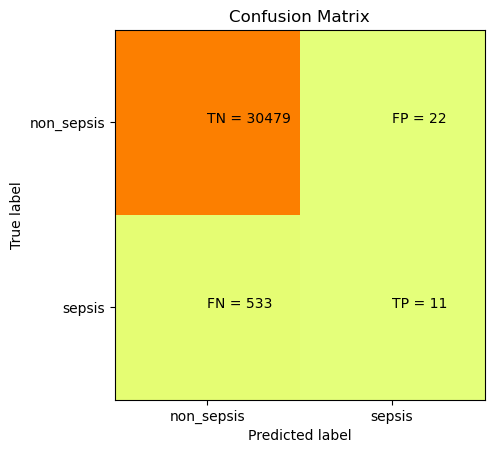

C:\Users\PAVILION USER\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


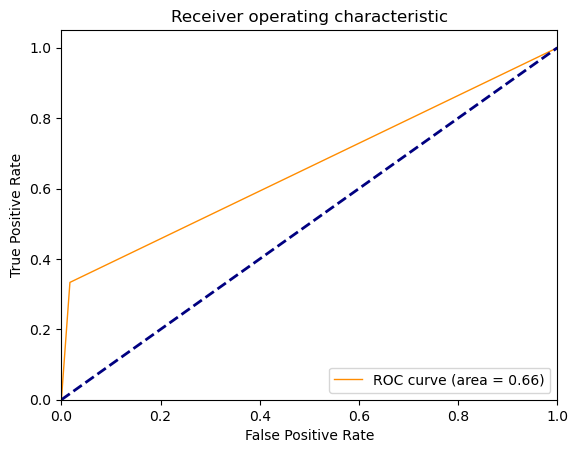

In [68]:
knn.fit(X_train,y_train)
pred_knn=knn.predict(X_test)
report_performance(knn)
roc_curves(knn)

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
# Initialize the Logistic Regression model
log_reg = LogisticRegression()

# Train the model
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Logistic Regression model evaluation:")
print("Accuracy:", accuracy)

Logistic Regression model evaluation:
Accuracy: 0.9826058946690288


C:\Users\PAVILION USER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [52]:
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     30501
           1       0.51      0.14      0.22       544

    accuracy                           0.98     31045
   macro avg       0.75      0.57      0.60     31045
weighted avg       0.98      0.98      0.98     31045



C:\Users\PAVILION USER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(




Confusion Matrix:
[[30430    71]
 [  469    75]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     30501
           1       0.51      0.14      0.22       544

    accuracy                           0.98     31045
   macro avg       0.75      0.57      0.60     31045
weighted avg       0.98      0.98      0.98     31045



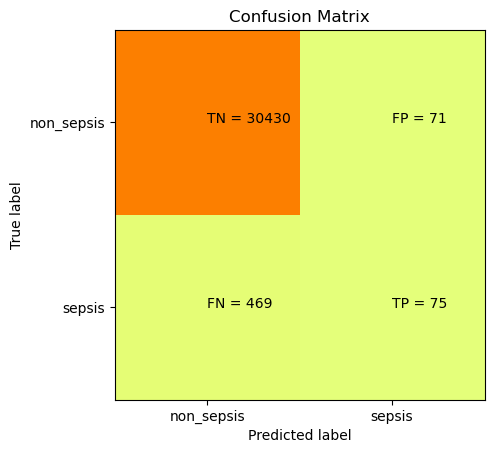

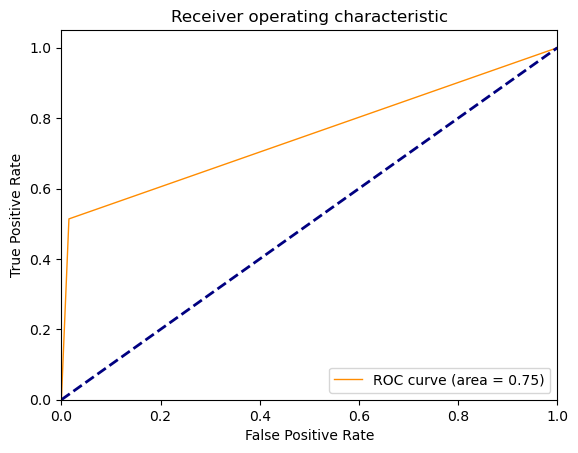

In [53]:
log_reg.fit(X_train,y_train)
pre_log_reg=log_reg.predict(X_test)
report_performance(log_reg)
roc_curves(log_reg)

In [54]:
from sklearn.naive_bayes import GaussianNB

In [55]:
# Initialize the Naive Bayes model
nb_model = GaussianNB()

# Train the model
nb_model.fit(X_train, y_train)

# Make predictions
y_pred = nb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Naive Bayes model evaluation:")
print("Accuracy:", accuracy)

Naive Bayes model evaluation:
Accuracy: 0.9180544371074247


In [56]:
print(report)

              precision    recall  f1-score   support

           0       0.99      0.92      0.96     30501
           1       0.11      0.54      0.19       544

    accuracy                           0.92     31045
   macro avg       0.55      0.73      0.57     31045
weighted avg       0.98      0.92      0.94     31045





Confusion Matrix:
[[28205  2296]
 [  248   296]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.99      0.92      0.96     30501
           1       0.11      0.54      0.19       544

    accuracy                           0.92     31045
   macro avg       0.55      0.73      0.57     31045
weighted avg       0.98      0.92      0.94     31045



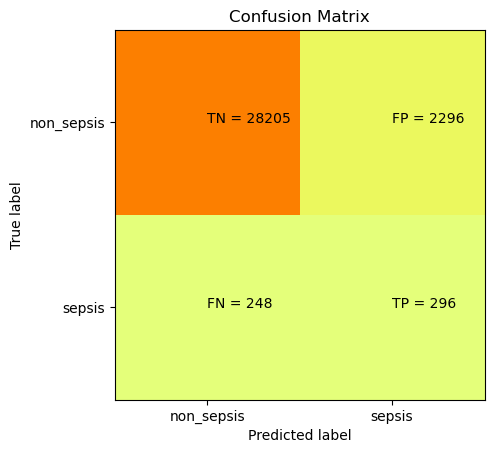

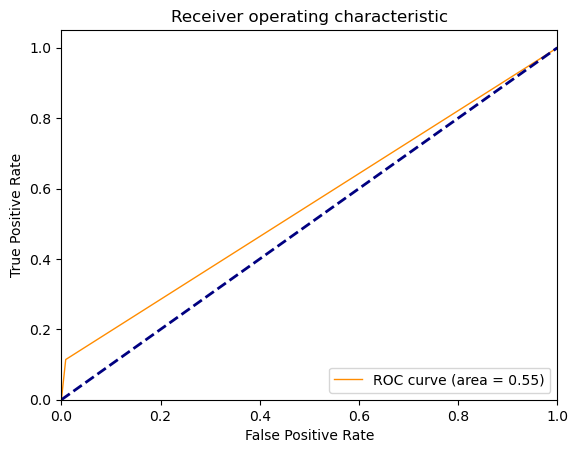

In [57]:
nb_model.fit(X_train,y_train)
pre_nb_model=nb_model.predict(X_test)
report_performance(nb_model)
roc_curves(nb_model)

In [58]:
from sklearn.tree import DecisionTreeClassifier

In [59]:
# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Make predictions
y_pred = dt_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [60]:
print("Decision Tree model evaluation:")
print("Accuracy:", accuracy)
print(report)

# Plotting the performance
models = ['Decision Tree']
accuracies = [accuracy]



Decision Tree model evaluation:
Accuracy: 0.9748107585762603
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     30501
           1       0.30      0.33      0.32       544

    accuracy                           0.97     31045
   macro avg       0.64      0.66      0.65     31045
weighted avg       0.98      0.97      0.98     31045





Confusion Matrix:
[[30083   418]
 [  364   180]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     30501
           1       0.30      0.33      0.32       544

    accuracy                           0.97     31045
   macro avg       0.64      0.66      0.65     31045
weighted avg       0.98      0.97      0.98     31045



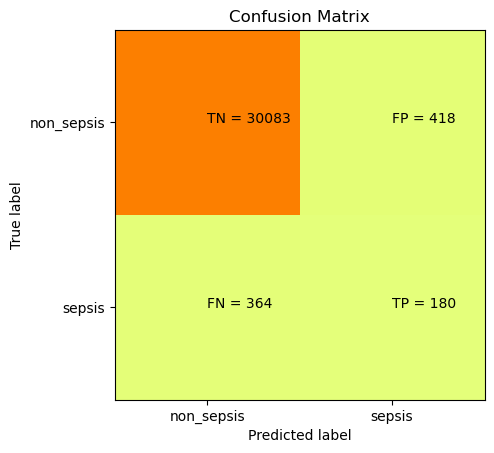

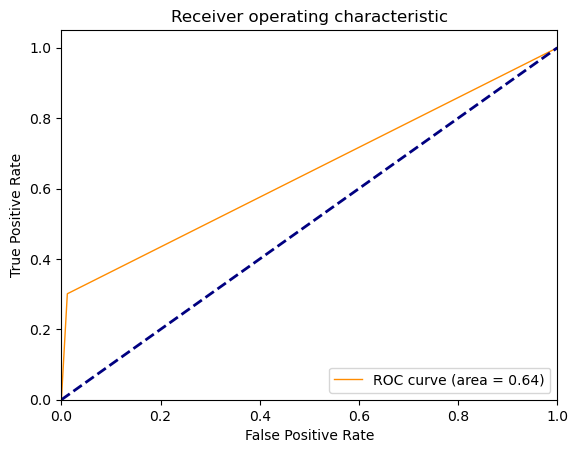

In [61]:
dt_model.fit(X_train,y_train)
pre_dt_model=dt_model.predict(X_test)
report_performance(dt_model)
roc_curves(dt_model)

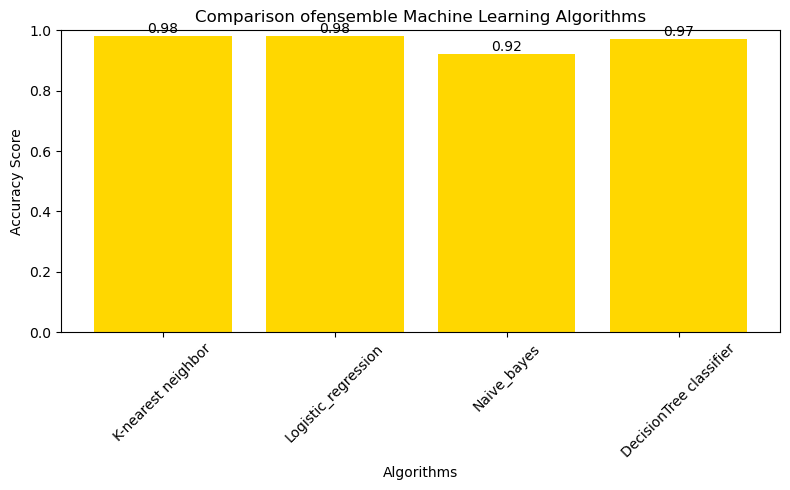

In [62]:
 # Sample data for algorithm performance comparison
algorithms = ['K-nearest neighbor', 'Logistic_regression','Naive_bayes', 'DecisionTree classifier']
accuracy_scores = [0.98, 0.98, 0.92, 0.97]

# Plotting the comparison
plt.figure(figsize=(8, 5))
plt.bar(algorithms, accuracy_scores, color='gold')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy Score')
plt.title('Comparison ofensemble Machine Learning Algorithms')
plt.ylim(0, 1)  # Set the y-axis limits between 0 and 1
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Display the accuracy scores on top of the bars
for i, score in enumerate(accuracy_scores):
    plt.text(i, score, str(score), ha='center', va='bottom')

plt.tight_layout()  # Adjust the layout to prevent overlapping elements
plt.show()